In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/Kaleem/
!ls

/content/drive/MyDrive/Upwork/Kaleem
10.jpg	   21.jpg	 inp.jpg       Segmentation01  test.jpg
13.jpg	   2.jpg	 JPCLN077.PNG  tar1.jpg        unet
13_v3.jpg  All247images  pred.jpg      target.jpg      unet.png
14.jpg	   code.ipynb	 segmentation  tar.jpg	       Untitled1.ipynb


In [3]:
import os

org_base_path='segmentation/org_train/'
lab_base_path='segmentation/label_train/'

print(len(os.listdir(org_base_path)))

os.listdir(org_base_path)[:3]

199


['case061.bmp', 'case069.bmp', 'case044.bmp']

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

X_train=[]
y_train=[]
X_test=[]
y_test=[]

with tqdm (total=len(os.listdir(org_base_path))) as pbar:
  for i,img_name in enumerate(os.listdir(org_base_path)):
    img=cv2.imread(org_base_path+img_name)
    img=cv2.resize(img,(256,256))
    try:
      
      img_name=img_name.split('.')[0]+"_label.png"
      img1=cv2.imread(lab_base_path+img_name)
      img1=cv2.resize(img1,(256,256))
      X_train.append(img)
      y_train.append(img1)
    except Exception as e:
      print("EXC: ", e)
      pass
    pbar.update(1)


100%|██████████| 199/199 [00:00<00:00, 212.36it/s]


In [5]:
X_train=np.array(X_train)
y_train=np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(199, 256, 256, 3)
(199, 256, 256, 3)


In [6]:
org_base_path='segmentation/org_test/'
lab_base_path='segmentation/label_test/'

with tqdm (total=len(os.listdir(org_base_path))) as pbar:
  for i,img_name in enumerate(os.listdir(org_base_path)):
    img=cv2.imread(org_base_path+img_name)
    img=cv2.resize(img,(256,256))
    try:
      img_name=img_name.split('.')[0]+"_label.png"
      img1=cv2.imread(lab_base_path+img_name)
      img1=cv2.resize(img1,(256,256))
      X_test.append(img)
      y_test.append(img1)
    except Exception as e:
      print("EXC: ", e)
      pass
    pbar.update(1)

X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_test.shape)
print(y_test.shape)

100%|██████████| 48/48 [00:00<00:00, 241.01it/s]

(48, 256, 256, 3)
(48, 256, 256, 3)


In [7]:
os.listdir(org_base_path)[:2]

['case207.bmp', 'case227.bmp']

(256, 256, 3)


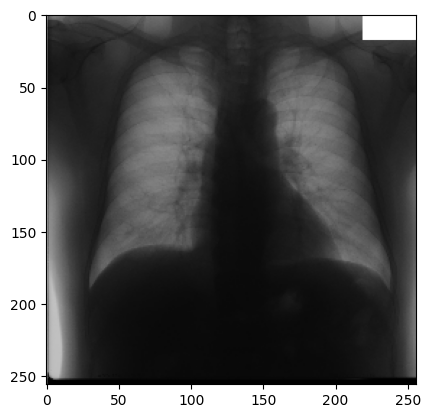

(256, 256, 3)


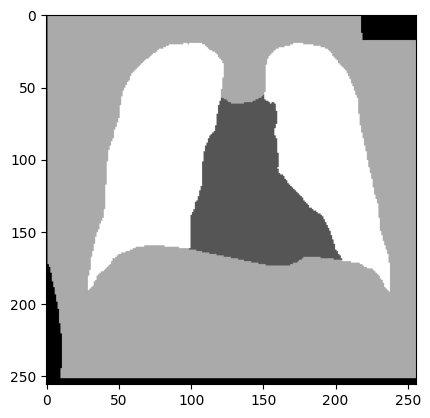

In [8]:
# plot a sample image and it's label
img = cv2.imread(org_base_path+'case207.bmp')
print(img.shape)
plt.imshow(img, cmap = "gray")

plt.show()

img = cv2.imread(lab_base_path+'case207_label.png')
print(img.shape)
plt.imshow(img, cmap = "gray")

In [8]:
!pip install transformers datasets torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 

In [9]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

X_train=torch.div(torch.tensor(X_train), 255.0)
y_train=torch.div(torch.tensor(y_train), 255.0)
X_test=torch.div(torch.tensor(X_test), 255.0)
y_test=torch.div(torch.tensor(y_test), 255.0)

X_train1 = torch.transpose(X_train, 1, 3)
y_train1 = torch.transpose(y_train, 1, 3)
X_test1 = torch.transpose(X_test, 1, 3)
y_test1 = torch.transpose(y_test, 1, 3)


In [10]:
X_train2 = torch.transpose(X_train1, 1, 3)
y_train2 = torch.transpose(y_train1, 1, 3)
X_test2 = torch.transpose(X_test1, 1, 3)
y_test2 = torch.transpose(y_test1, 1, 3)

In [41]:
train_dataset = MyDataset(X_train1, y_train1)
test_dataset = MyDataset(X_test1, y_test1)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [32]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # contracting path
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=2)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=2)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=2)
        self.bn4 = nn.BatchNorm2d(512)
        # expansive path
        self.conv_transpose1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv_transpose2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv6 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.conv_transpose3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv7 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(64)
        
        self.conv_transpose4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.conv8 = nn.Conv2d(32, 3, kernel_size=1)

    def forward(self, x):
        # contracting path
        x1 = F.relu(self.bn1(self.conv1(x)))
        x2 = F.relu(self.bn2(self.conv2(x1)))
        x3 = F.relu(self.bn3(self.conv3(x2)))
        x4 = F.relu(self.bn4(self.conv4(x3)))
        
        # expansive path
        x = F.relu(self.conv_transpose1(x4))
        
        x = torch.cat([x, x3], dim=1)
        x = F.relu(self.bn5(self.conv5(x)))
        
        x = F.relu(self.conv_transpose2(x))
        x = torch.cat([x, x2], dim=1)
        
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.conv_transpose3(x))
        
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.bn7(self.conv7(x)))
        
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.bn7(self.conv7(x)))
        
        x = F.relu(self.conv_transpose4(x))
        #print(x.size())
        
        x = torch.sigmoid(self.conv8(x))
        #print(x.size())
        return x

model = UNet()

optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.BCELoss()


In [33]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
import gc
gc.collect()

6088

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

n_epochs = 50

train_losses=[]
val_losses=[]

for epoch in range(n_epochs):
    train_loss = 0.0
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()  # convert input tensor to float
        targets = targets.float()  # convert input tensor to float
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.float()  # convert input tensor to float
            targets = targets.float()  # convert input tensor to float
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    val_losses.append(test_loss)
    print('Test Loss: {:.4f}'.format(test_loss))

Epoch: 1, Training Loss: 0.5603
Test Loss: 0.5204
Epoch: 2, Training Loss: 0.4669
Test Loss: 0.4741
Epoch: 3, Training Loss: 0.4450
Test Loss: 0.4563
Epoch: 4, Training Loss: 0.4357
Test Loss: 0.4482
Epoch: 5, Training Loss: 0.4332
Test Loss: 0.4521
Epoch: 6, Training Loss: 0.4344
Test Loss: 0.4541
Epoch: 7, Training Loss: 0.4263
Test Loss: 0.4388
Epoch: 8, Training Loss: 0.4250
Test Loss: 0.4485
Epoch: 9, Training Loss: 0.4224
Test Loss: 0.4379
Epoch: 10, Training Loss: 0.4218
Test Loss: 0.4392
Epoch: 11, Training Loss: 0.4202
Test Loss: 0.4385
Epoch: 12, Training Loss: 0.4181
Test Loss: 0.4657
Epoch: 13, Training Loss: 0.4177
Test Loss: 0.4338
Epoch: 14, Training Loss: 0.4180
Test Loss: 0.4750
Epoch: 15, Training Loss: 0.4227
Test Loss: 0.4385
Epoch: 16, Training Loss: 0.4175
Test Loss: 0.4355
Epoch: 17, Training Loss: 0.4145
Test Loss: 0.4352
Epoch: 18, Training Loss: 0.4145
Test Loss: 0.4328
Epoch: 19, Training Loss: 0.4131
Test Loss: 0.4345
Epoch: 20, Training Loss: 0.4151
Test Lo

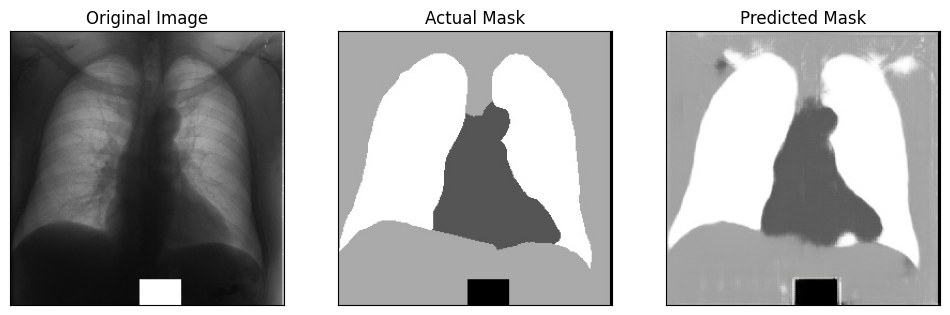

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get a sample image from the test dataset
sample_idx = 13

# Generate prediction using the trained model
model.eval()
with torch.no_grad():
    input_tensor = X_test1[sample_idx].unsqueeze(0)
    input_tensor = input_tensor.float()  # convert input tensor to float
    input_tensor = input_tensor.to(device)
    output = model(input_tensor)
    input_tensor=torch.transpose(input_tensor, 1, 3).squeeze().cpu().numpy()
    output = torch.transpose(output, 1, 3).squeeze().cpu()
    out=output.numpy()
    
    predicted_mask=out
    target_mask=y_test2[sample_idx].cpu().numpy()
    
cv2.imwrite("inp.jpg",input_tensor*255)
cv2.imwrite("target.jpg",target_mask*255)
cv2.imwrite("pred.jpg",predicted_mask*255)

x1=cv2.imread("inp.jpg")
x2=cv2.imread("target.jpg")
x3=cv2.imread("pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Actual Mask')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

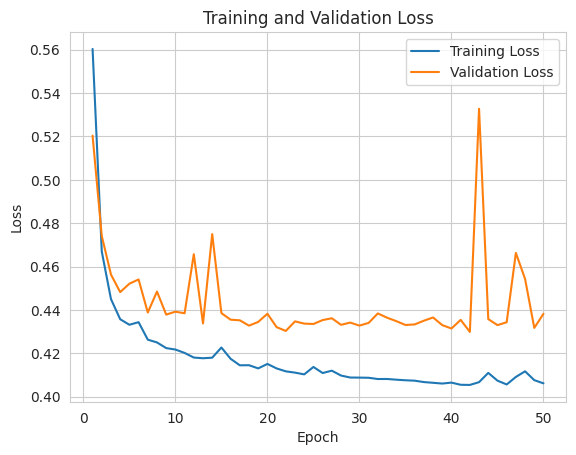

In [42]:
# create a Pandas DataFrame to store the train and validation loss values
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'Epoch': range(1, n_epochs+1), 
                   'Train Loss': train_losses,
                   'Val Loss': val_losses})

# plot the train and validation loss using Seaborn's lineplot function
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Epoch', y='Train Loss', label='Training Loss')
sns.lineplot(data=df, x='Epoch', y='Val Loss', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
#deeplabV3

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models.segmentation.deeplabv3 import DeepLabHead, DeepLabV3
from torchvision import transforms
from torchvision.models.segmentation import deeplabv3_resnet50

train_dataset = MyDataset(X_train1, y_train1)
test_dataset = MyDataset(X_test1, y_test1)

# Define your dataloader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
from torchvision import models

model = models.segmentation.deeplabv3_resnet50(pretrained=True, progress=True)
num_classes = 3
model.classifier = nn.Sequential(
    nn.Conv2d(2048, num_classes, kernel_size=(1, 1), stride=(1, 1)),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [17]:
# Define the training loop
n_epochs = 50
train_losses=[]
val_losses=[]

for epoch in range(n_epochs):
    train_loss = 0.0
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()  # convert input tensor to float
        targets = targets.float()  # convert input tensor to float
        
        optimizer.zero_grad()
        outputs = model(inputs)['out']
        
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.float()  # convert input tensor to float
            targets = targets.float()  # convert input tensor to float
        
            outputs = model(inputs)['out']
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    val_losses.append(test_loss)
    print('Test Loss: {:.4f}'.format(test_loss))


Epoch: 1, Training Loss: 0.4739
Test Loss: 0.4564
Epoch: 2, Training Loss: 0.4310
Test Loss: 0.4417
Epoch: 3, Training Loss: 0.4276
Test Loss: 0.4392
Epoch: 4, Training Loss: 0.4258
Test Loss: 0.4386
Epoch: 5, Training Loss: 0.4250
Test Loss: 0.4381
Epoch: 6, Training Loss: 0.4238
Test Loss: 0.4367
Epoch: 7, Training Loss: 0.4228
Test Loss: 0.4389
Epoch: 8, Training Loss: 0.4226
Test Loss: 0.4365
Epoch: 9, Training Loss: 0.4220
Test Loss: 0.4363
Epoch: 10, Training Loss: 0.4215
Test Loss: 0.4355
Epoch: 11, Training Loss: 0.4212
Test Loss: 0.4368
Epoch: 12, Training Loss: 0.4212
Test Loss: 0.4366
Epoch: 13, Training Loss: 0.4212
Test Loss: 0.4372
Epoch: 14, Training Loss: 0.4238
Test Loss: 0.6348
Epoch: 15, Training Loss: 0.4306
Test Loss: 0.4689
Epoch: 16, Training Loss: 0.4279
Test Loss: 0.4394
Epoch: 17, Training Loss: 0.4253
Test Loss: 0.4373
Epoch: 18, Training Loss: 0.4233
Test Loss: 0.4373
Epoch: 19, Training Loss: 0.4224
Test Loss: 0.4363
Epoch: 20, Training Loss: 0.4218
Test Lo

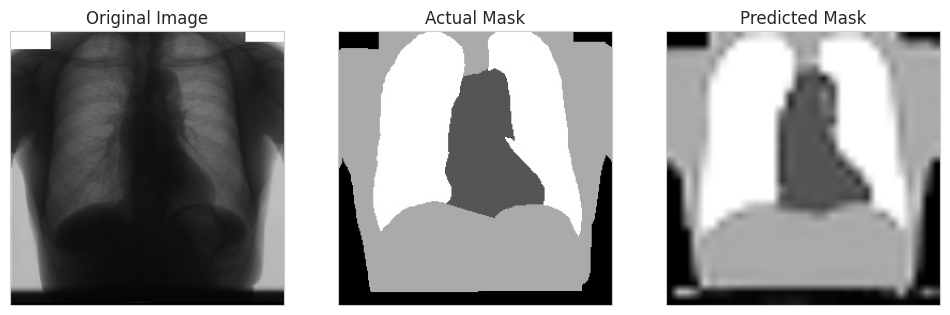

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get a sample image from the test dataset
sample_idx = 10

# Generate prediction using the trained model
model.eval()
with torch.no_grad():
    input_tensor = X_test1[sample_idx].unsqueeze(0)
    input_tensor = input_tensor.float()  # convert input tensor to float
    input_tensor = input_tensor.to(device)
    output = model(input_tensor)['out']
    input_tensor=torch.transpose(input_tensor, 1, 3).squeeze().cpu().numpy()
    output = torch.transpose(output, 1, 3).squeeze().cpu()
    out=output.numpy()
    
    predicted_mask=out
    target_mask=y_test2[sample_idx].cpu().numpy()
    
cv2.imwrite("inp.jpg",input_tensor*255)
cv2.imwrite("target.jpg",target_mask*255)
cv2.imwrite("pred.jpg",predicted_mask*255)

x1=cv2.imread("inp.jpg")
x2=cv2.imread("target.jpg")
x3=cv2.imread("pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Actual Mask')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+"_v3.jpg")

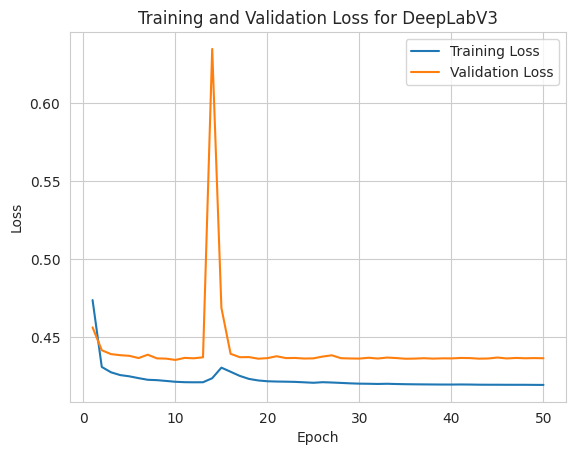

In [19]:
# create a Pandas DataFrame to store the train and validation loss values
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'Epoch': range(1, n_epochs+1), 
                   'Train Loss': train_losses,
                   'Val Loss': val_losses})

# plot the train and validation loss using Seaborn's lineplot function
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Epoch', y='Train Loss', label='Training Loss')
sns.lineplot(data=df, x='Epoch', y='Val Loss', label='Validation Loss')
plt.title('Training and Validation Loss for DeepLabV3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()